<a href="https://colab.research.google.com/github/jt7277/LoughUni-AeroEng/blob/main/MI_cw_clustering_%26_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MACHINE INTELLIGENCE (22TTC201) COURSEWORK**  

---
Enter your student ID:


In [43]:
student = 'F025607'

Use the next cell to import the necessary files for the coursework:


*   **data.pkl**
*   **util.py**

You should have downloaded these two files in your computer already. After running the cell, click on:image.png and select the files in your computer.

In [44]:
from google.colab import files
files.upload();

Saving data.pkl to data (1).pkl
Saving util.py to util (1).py


Once the files are uploaded, we can import the required libraries to load and plot the data:

In [45]:
import util
import matplotlib.pyplot as plt
import matplotlib

Import the data:

In [46]:
X = util.data_student(student)

You are not required to understand any of the cells above. The coursework activity starts from here with the description of the data.

## **Data description:**
You have available the following data array:

$X$: this is all your data; an array composed of $25,000$ samples with $5$ features each; $X\in\mathbb{R}^{25,000\times 5}$. 

There is additional data (not available to you) with the known labels of the data. These will be used to validate your model and to check its accuracy. Therefore, use the taught materials to ensure that you are not overfitting; **i.e., your model will be tested with another dataset (labelled) not available to you.**

**Please also note**:


*   The work will be checked for **plagiarism** with an automated algorithm.
*   The coursework is individual and not group based.
*   It is not likely to happen that any two students land up with the same implementation, due to the many choices in hyperparameter tuning and architecture selection.
*  The computer labs have specific assigned tasks already and are not meant for solving your coursework.
*  Academics will only answer questions about coursework if you do not understand any of the questions. Academics and assistants will not provide answers on:


1.   How to answer the questions.
2.   Which model to choose.
3.   How to choose the hyperparameters.
4.   How to avoid overfitting.
5.   How to find errors in the coursework code.

These points will be evaluated to determine your marks and are part of the coursework.

We highly recommend that you implement your coursework fully individually, as this will avoid that your implementation is influenced by others and flagged by the system.


The next cell plots the data in 2D. As the data is five dimensional, only the first two variables are plotted. Think that this is only a two dimensional projection of the five dimensional data.

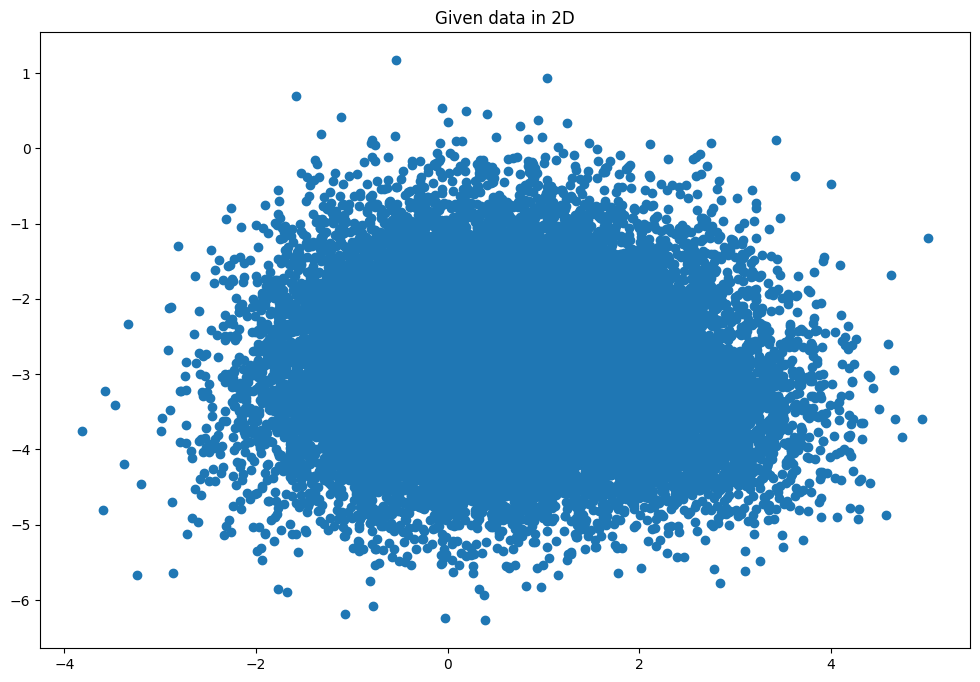

In [47]:
plt.figure(figsize=(12, 8))
plt.title("Given data in 2D")
ax = plt.gca()
sct = ax.scatter(X[:,0], X[:,1])

This data is formed by **5 different clusters**, but we have lost the labels in the data. Your first task is to use the GMM clustering to recover the labels.

# **Task 1: Clustering (GMM)**
* Your code follows:
* Please split your code into various cells for clarity

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_spd_matrix
# to create a symmetric positive definite covariance matrix
from scipy.stats import multivariate_normal
# having embedded multivariate_normal pdf function

## a. Initialise the cluster centres, covariance matrices and mixing coefficients **[5 marks]**

In [49]:
### your code here

#clusters to be learned
k = 5

#initialising centres:
np.random.seed(42)
meanid = np.random.choice(range(X.shape[0]), k)   #2nd imput determines how many random numbers are generated as an array in the range of the 1st input
means = X[meanid]   #uses the random numbers generated as indexes to select k random cluster centres

# initialising weights (mixing coefficients)
weights = np.ones(k) / k  #makes an array of k 1s and divides each 1 by k

# initialising symmetric positive definite covariance matrices
cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1])) #for loop creates k random covariance matrices
cov = np.array(cov)   #converting to an array

#print("Initial means:\n", means)
#print ("Initial covariances:\n",cov)
#print("Initial mixing coefficients:", weights)

## b. Implement the Expectation–Maximization (EM) method **[5 marks]**
* note: do not include any figures in this section

In [50]:
### your code here

#implementing the equations from the GMM lecture
#Expectation step
likelihood = []
for j in range(k):
   likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))   #likelihood is the probability that the model produces observations in mix given it has parameters mean & cov
likelihood = np.array(likelihood)     
  
gamma = []
for j in range(k):
  # posterior = likelihood * prior / evidence
  gamma.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)))   #use Bayes theorem to find gamma_n|k (=liklihood*prior/evidence) 
                                                                                                                    #                                    [where evidence=sum(likelihood*prior)]
  
# Maximization step:    i.e. estimating new parameters for gamma update using MLE results   
  # update mean and covariance
  means[j] = np.sum(gamma[j].reshape(len(X),1) * X, axis=0) / (np.sum(gamma[j]))
  cov[j] = (gamma[j].reshape(len(X),1) * (X - means[j])).T.dot(X - means[j]) / (np.sum(gamma[j]))
  # update the sizes/weights
  weights[j] = np.mean(gamma[j])
                                             #i.e. evaluating the p.d.f at each data point in mix using the parameters mean & cov

## c. Assign labels to the given data according to the learned clusters **[10 marks]**
* implement code to identify which data points belong to which cluster

#__gamma__ is the *__probability__* that *x_n belongs to cluster k* i.e. the *probabilies of data belonging to each cluster*
###i must find the maximum probability for each data point i.e. **find the index of the greatest probability for each row in gamma**
##gamma is currently a list of 5 elements, each element being an array of probabilities
##these arrays are the probabilities that each data point lies in that cluster
*so there are 5 arrays as there are 5 clusters*


In [51]:
  ### your code here
#using the zip function to group each element in each array for comparison

gamma_ordered=list(zip(gamma[0],gamma[1],gamma[2],gamma[3],gamma[4]))
x_list=len(gamma_ordered) #finding length of new list (should be equal to no. of data points)

#finding index of max value of each responsibility i.e. the index of the cluster each data point belongs to that 

max_index=[]
for i in range(x_list):
    max_index.append(np.argmax(gamma_ordered[i]))

#next is to label each data point with its corresponding cluster
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
for i in range(x_list):
    if max_index[i]==0:
      cluster1.append(X[i])

    elif max_index[i]==1:
      cluster2.append(X[i])

    elif max_index[i]==2:  
      cluster3.append(X[i])

    elif max_index[i]==3:  
      cluster4.append(X[i])

    else:
      cluster5.append(X[i])

print('cluster 1 has', len(cluster1),'data points')
print('cluster 2 has', len(cluster2),'data points')
print('cluster 3 has', len(cluster3),'data points')
print('cluster 4 has', len(cluster4),'data points')
print('cluster 5 has', len(cluster5),'data points')

#converting all clusters to arrays for ease of plotting

cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
cluster3=np.array(cluster3)
cluster4=np.array(cluster4)
cluster5=np.array(cluster5)

cluster 1 has 2737 data points
cluster 2 has 11358 data points
cluster 3 has 1039 data points
cluster 4 has 9036 data points
cluster 5 has 830 data points


## d. Visualise the learned clusters of the given data in 2D, i.e., using the first two variables **[10 marks]**
* plot a figure to demonstrate which data points belong to which cluster
* use a figure legend identifying the cluster numbers
* include a Gaussian contour for each cluster

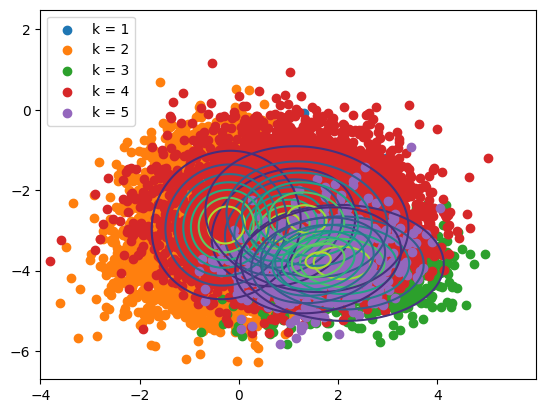

In [102]:
### your code here
# Create a grid for visualization purposes
x1, y1 = np.mgrid[-4:6:.01, -6:2.5:.01]
position = np.dstack((x1,y1))

#plot clusterd data

plt.scatter(cluster1[:,0],cluster1[:,1], marker='o', label='k = 1')
plt.scatter(cluster2[:,0],cluster2[:,1], marker='o', label='k = 2')
plt.scatter(cluster3[:,0],cluster3[:,1], marker='o', label='k = 3')
plt.scatter(cluster4[:,0],cluster4[:,1], marker='o', label='k = 4')
plt.scatter(cluster5[:,0],cluster5[:,1], marker='o', label='k = 5')
plt.legend(loc='upper left')


# visualising grouped clusters

# creating grid for contour
x2, y2 = np.mgrid[np.min(X):20:np.max(X), np.min(X):20:np.max(X)]
position2 = np.dstack((x2,y2)) # forms 2D grid

  # creating contour plot
for j in range(k):
    # Extract means for the first two dimensions of the data
    mean_2d = means[j][:2]
    
    # Extract covariance for the first two dimensions of the data
    cov_2d = cov[j][:2, :2]
    
    # Create multivariate normal distribution
    z = multivariate_normal(mean_2d, cov_2d).pdf(position)

    # create contour plot
    plt.contour(x1, y1, z)

plt.show()

Please note: 
* Your clusters may look a little garbled in the figure above, this is because we are projecting variables in a five-dimentional space into two dimensions. In the original five-dimensional space (if we could see it), the clustering would appear much more effective.
* The T-SNE algorithm assists in this cases by letting us display high dimensional data in two dimensions.

## e. Use the T-SNE algorithm to better display your clustering results and Comments **[10 marks]**

At this stage you should have:

**A vector of labels** $Y$ with the labels $0$ to $4$, indicating which cluster each of the samples in $X$ belongs to: $Y\in\mathbb{R}^{25000\times 1}$ according to your clustering.

The T-SNE is coded for you, your job is only to choose the perplexity parameter so that the clusters are better showcased. You can learn more on the T-SNE algorithm from ([T-SNE scikit](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)). Investigate the perplexity parameter.

In [53]:
Y=np.array(max_index)
Y.shape

(25000,)

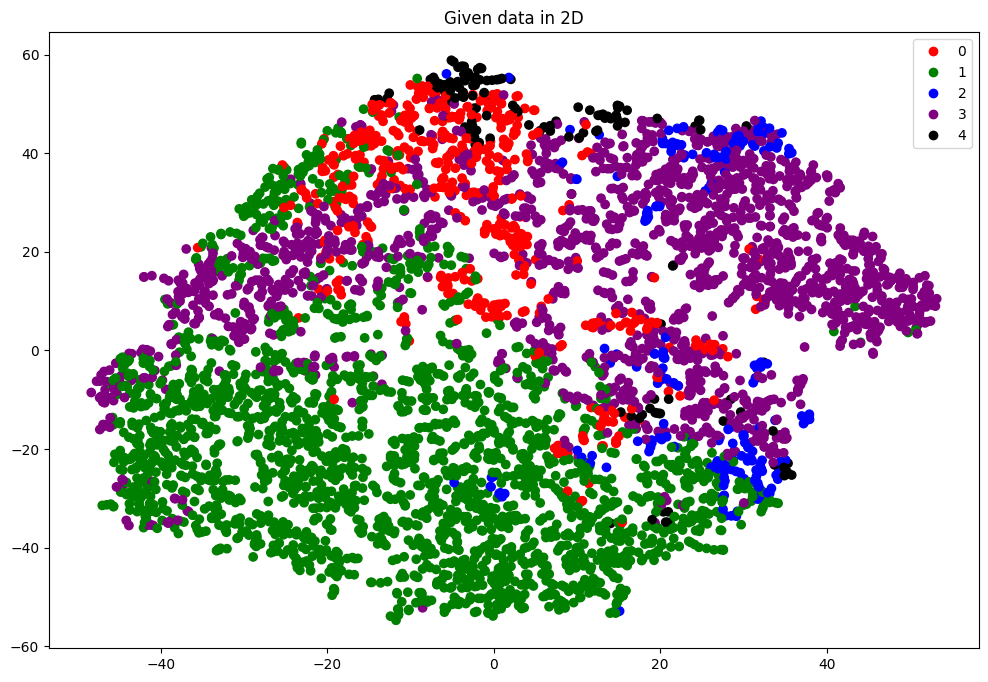

In [54]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(X[0:5000,:])

colors = ['red', 'green', 'blue', 'purple', 'black']
plt.figure(figsize=(12, 8))
plt.title("Given data in 2D")
ax = plt.gca()
sct = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=Y[0:5000], cmap=matplotlib.colors.ListedColormap(colors))
ax.legend(handles=sct.legend_elements()[0], labels=['0','1','2','3','4'])


### **Add comments** below explaining in 3 short sentences:
* What is the perplexity parameter in T-SNE?

* Your results and discussions in Task 1.


### your answers here:

1.   perplexity parameter in T-SNE ...

    t-SNE positions points in lower dimensions such that _relationships with nearby points_ in higher dimensions are preserved...
    perplexity controls how many **neighboring points** each higher-dimensional data point considers when it tries to find its position in lower-dimensional space, this information affects how the 5-D data in X is projected in 2-D - making complexity a critical parameter


2.   results ...

    data labels were succesfully recovered and samples were assingned to 5 clusters: the modal cluster was cluster 2 which had around 45% of all data samples, cluster 5 was the least popular with around 3% of samples - data was visualised in 2 dimensions using the first 2 features, but this was hard to interpret as data was garbled


3.   discussions ...

    there were no outliers/points that do not conform to expected patterns meaning it is unlikely that the algorithm requires additional clusters - futher insights could be derived if we had knowledge of what each sample in each cluster physically meant, patterns and trends by cluster would then reveal themselves

# **Task 2: Classification**

In Task 2, you are going to build a classifier

Your code follows: (please split your codes into various cells)

In [55]:
# importing pytorch and some pytorch utils
import torch
from torch.utils.data import TensorDataset, DataLoader

## a. Normalise the data in $X$ with Gaussian normalisation **[5 marks]**

In [56]:
### your code here
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)

## b. Split your data into training and development sets **[5 marks]**

At the end of this question you should have the following arrays available:
* $X_{train} \in \mathbb{R}^{20,000\times 5}$
* $Y_{train} \in \mathbb{R}^{20,000\times 1}$
* $X_{dev} \in \mathbb{R}^{5,000\times 5}$
* $Y_{dev} \in \mathbb{R}^{5,000\times 1}$

In [57]:
### your code here
X_train = []
Y_train = []
X_dev = []
Y_dev = []

for i in range(20000):
  X_train.append(X[i])
  Y_train.append(Y[i])
X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

for j in range(20000,len(X)):
  X_dev.append(X[j])
  Y_dev.append(Y[j])
X_dev=np.array(X_dev)
Y_dev=np.array(Y_dev)
print(X_dev.shape)
print(Y_dev.shape)

(20000, 5)
(20000,)
(5000, 5)
(5000,)


## c. Implement a classification algorithm that is able to predict which cluster each sample *belongs to* **[30 marks]**

* You can choose among any of the algorithms studied in the course.
* Monitor and plot the loss in both training and development sets so that you can adjust hyperparameters.
* Play with the hyperparameters and select them to yield the maximum performance.
* This question will be marked according to the performance (using the **test data** set not available to you).

In [58]:
### your code here - deep MLP w/ 2 hidden layers
#converting to tensor format so that data can be used eaily by PyTorch and the GPU
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train)
X_dev = torch.tensor(X_dev).float()
Y_dev = torch.tensor(Y_dev)

train_DS = TensorDataset(X_train, Y_train)
dev_DS = TensorDataset(X_dev, Y_dev)

In [59]:
class deep_MLP_classification(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
    super(deep_MLP_classification, self).__init__()

    self.linear = torch.nn.Linear(in_features=input_dim, out_features=hidden_dim_1, bias=True)
    self.linear2 = torch.nn.Linear(in_features=hidden_dim_1, out_features=hidden_dim_2, bias=True)  #input to 2st hidden layer is output of 1st hidden layer
    self.linear3 = torch.nn.Linear(in_features=hidden_dim_2, out_features=output_dim, bias=True)    #input to last layer is output of 2nd hidden layer
    self.relu = torch.nn.ReLU()

  def forward(self, x):

    l1 = self.linear(x)
    l1a = self.relu(l1)
    l2 = self.linear2(l1a)
    l2a = self.relu(l2)
    output = self.linear3(l2a)
#notice softMAX is missing - no. of operations minimised - don't need to specify softMAX because it is included by default in multinomial classification (PyTorch knows as we use CE loss function)

    return output

Architecture defined, now need to initialise a particular instance of the model in the class above. The number of inputs is given by the data (length of each data sample $=5=$ features per sample). The number of outputs is given by the number of classes ($5$ in this case). The number of neurons in hidden layers are hyperparameters (something I tune). Lets start with $60$ & $50$ :

In [95]:
torch.manual_seed(42) #set random seed for reproducibility 
deep_classifier = deep_MLP_classification(5,70,50,5) #5 inputs, 60 hidden neurons, another 50 hidden neurons, 5 outputs

Model now initialised, PyTorch has also **randomly** chosen initial values for model parameters


The next steps are as usual:


1.   Specify a loss function (cross-entropy for classification).
2.   Specify an optimisation algorithm (gradient descent for now), and its learning rate.
3.   Specify the batch size in the data loader.
4.   Specify the maximum number of epochs.


In [96]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(deep_classifier.parameters(),lr=0.0001) #2. state algo used to optimise parameters #uses moving average of grads so there is less error fluctuation due to bad data samples [avoids huge deviations]
trainLoader = DataLoader(dataset=train_DS, batch_size=20) #3. define data loader [batch size 2nd most important hyperparameter] (algo receives 20 samples at each iteration)
n_epoch = 100  #algorithm sees data set 100 times

In [97]:
L = []
L_dev = []

for epoch in range(n_epoch): #number of passes through the entire dataset (100)
  L_batch = []
  for x_batch, y_batch in trainLoader: #each of the batches of the entire data - takes 1 batch of inputs & 1 of targets
    output = deep_classifier(x_batch)  #calculate output of the model for the given batch
    #1 batch of inputs & outputs
    
    loss = criterion(output,y_batch) #calculate the error
    #loss calculated

    L_batch.append(loss.item())
    #delete grads from last iteration
    optimizer.zero_grad() #initialize gradients (Pytorch required this, otherwise the gradients are accumulated at each iteration - bad thing)
    loss.backward() #backpropagate the error - new grads of error
    optimizer.step() #update one step of gradient descent
  L.append(np.mean(L_batch))  #mean of error per epoch

  output = deep_classifier(X_dev)
  loss_dev = criterion(output,Y_dev)
  L_dev.append(loss_dev.item())

**visualising results:**

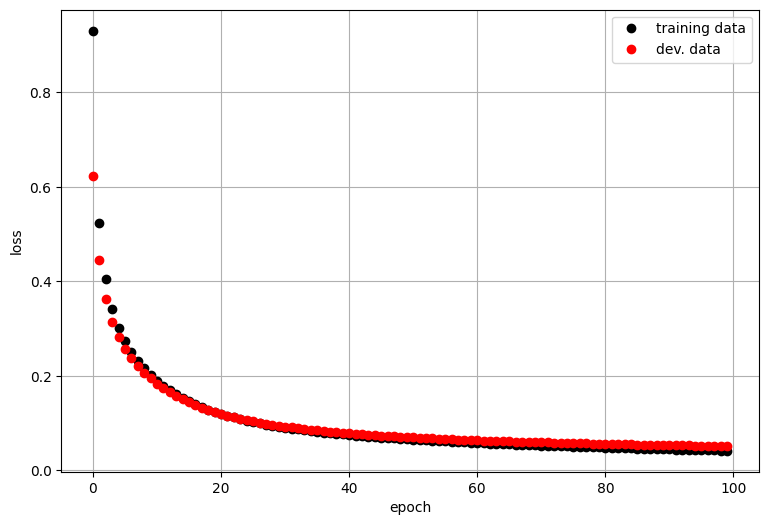

Accuracy in dev set: 98.26%


In [98]:
plt.figure(figsize=(9,6))
plt.plot(L,'ko')
plt.plot(L_dev, 'ro')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data','dev. data'])
plt.grid()
plt.show()

# find accuracy in dev set

output = deep_classifier(X_dev)
prediction = torch.softmax(output,dim=1).detach().numpy().argmax(axis=1)
ground_truth = np.array(Y_dev)

accuracy = np.sum(ground_truth == prediction)/np.size(prediction)
print("Accuracy in dev set: {}%".format(accuracy*100))

### **Provide code instructions** below, given test data `X_test`, `Y_test`, how to compute and print the accuracy value of the test data using the developed ANN model from the previous cell. 

### your code instructions here:

```python
# finding accuracy in test set

output = deep_classifier(X_test)
prediction = torch.softmax(output,dim=1).detach().numpy().argmax(axis=1)
ground_truth = np.array(Y_test)

accuracy = np.sum(ground_truth == prediction)/np.size(prediction)
print("Accuracy in dev set: {}%".format(accuracy*100))
```

## d. Perform error analysis on the data: **[10 marks]**



*   Find precision and recall
*   Find F-scores
*   Average those values for each of the classes and summarise results in a table



In [100]:
### your code here
import pandas as pd # we use pandas library onlt to show the results in table format

precision = [] #empty list, we will iterate now through each of the binary questions to fill in the lists
recall = []
f1_score = []

for feature in range(5):
  TP = np.sum(np.logical_and(ground_truth == prediction, ground_truth==feature))
  TN = np.sum(np.logical_and(ground_truth != prediction, ground_truth!=feature))
  FP = np.sum(np.logical_and(feature == prediction, ground_truth!=feature)) #model classifies a sample to a cluster but in reality they do not match
  FN = np.sum(np.logical_and(feature != prediction, ground_truth==feature)) 
  PREC = TP/(TP+FP)
  REC = TP/(TP+FN)
  F1 = 2*(PREC*REC)/(PREC+REC)

  precision.append(PREC)
  recall.append(REC)
  f1_score.append(F1)

precision.append(np.mean(precision))
recall.append(np.mean(recall))
f1_score.append(np.mean(f1_score))

c=list(range(5))
c.append("MEAN")
pd.DataFrame([precision,recall,f1_score],index=["Precision","Recall","F1 score"],columns=c)

,0,1,2,3,4,MEAN
Precision,0.97148,0.993330,0.954338,0.979029,0.949686,0.969572
Recall,0.97148,0.987622,0.976636,0.985556,0.926380,0.969535
F1 score,0.97148,0.990468,0.965358,0.982281,0.937888,0.969495


## e. Comment on your results **[10 marks]**
* In about five short sentences, discuss your hyperparameter tuning and results in Task 2.

### your answers here:


1.   once trained, the deep learning classification model achieved a 98.26% overall accuracy - meaning it correctly classified samples into their clusters at a better rate than humans who typically operate at 98% (e.g. 98% accuracy in human classification of MNIST dataset); the algorithm's mean F1 score was reletively high (0.97), meaning it tended to avoid false positives and identified most positive cases in classification; a simpler network architecture arguably could have given similar results, single-layer MLP could have been used due to the simple nature of the data and inefficient hyperparameter tuning & regularising techniques (like dropout or L2 regularisation) could have been implemented to prevent overfitting


2.   the initial hyperparameter investigation showed learning rate, no. of hidden neurons per layer and batch size to be the most sensitive hyperparameters (small deviations causing large declines in model performance) - these were tuned manually but may have been improved with automated techniques like Bayesian optimisation


3.   the final learning rate was chosen to balance convergence speed and stability - at higher orders of magnitude, the network experienced increasing loss; batch size was increased and this led to large convergence times, but when decreased, updates were discovered to be too noisy - hence the final size was considered optimal


4.   accuracy was deemed satisfactory before epoch size was changed, so it was decided to leave this hyperparameter unchanged so that the model did not train itself for too long and induce overfitting


5.   error analysis of misclassified samples would help identify common features that could explain misclassification, these insights would allow improvement of areas where algorithm struggles; finally, increased computational resources may have resulted in a different set of optimal hyperparameters which may have yielded more accurate results - but at 98.26% accuracy, any improvement is likely to not be worth the added time/money



# **SUBMISSION**

For sumission, the following **two files** are required:


*   This **notebook** with your solutions and answers: rename it to coursework_ID.ipynb, where ID is your student ID.
*   A **pdf printout** of the notebook after executing all the cells. It is advisible to restart the kernel before running all the cells then (File -> Print -> save as pdf) with the same naming convention.

